<h1> ETL GOOGLE MAPS

In [ ]:

print(df.head())import pandas as pd
from google.colab import files
import io
import json

# Subir archivo desde el disco local
uploaded = files.upload()

# Get the filename of the uploaded file. We assume there's only one.
filename = next(iter(uploaded))

data_list = []  # List to store individual JSON objects

# Leer el archivo JSON cargado línea por línea
with io.TextIOWrapper(io.BytesIO(uploaded[filename]), encoding='utf-8') as f:
    for line in f:
        try:
            data = json.loads(line)  # Parse each line as a separate JSON object
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {e}")
            # Print a portion of the line content around the error location for debugging
            error_position = e.pos
            print(f"Content around error: {line[max(0, error_position - 50):min(len(line), error_position + 50)]}")

# Now you have a list of JSON objects
# You can normalize them into a DataFrame
df = pd.json_normalize(data_list)

# Iterate through columns and check for lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Consider handling these before checking for duplicates.")
        # Example handling: converting lists to strings
        # df[col] = df[col].astype(str)

# Mostrar las primeras filas para verificar la carga correcta

SyntaxError: invalid syntax (<ipython-input-3-085cb2c9c0e3>, line 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ijson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
[
    {"user_id": "value1"},
    {"user_id": "value2"}
]

[{'user_id': 'value1'}, {'user_id': 'value2'}]

In [ ]:
[
    {"user_id": "value1"},
    {"user_id": "value2"}
]

[{'user_id': 'value1'}, {'user_id': 'value2'}]

In [ ]:
!head -n 5 "/content/drive/My Drive/1.json"

{"user_id": "114043824230907811356", "name": "Kanisha Mixon", "time": 1597168272670, "rating": 5, "text": "Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!", "pics": null, "resp": null, "gmap_id": "0x8862134e67ff5c87:0x38b5e2ae99cd1fcf"}
{"user_id": "116009008420407071921", "name": "Brandie Hodges", "time": 1609899039594, "rating": 5, "text": "Best clothing intown", "pics": null, "resp": null, "gmap_id": "0x8862134e67ff5c87:0x38b5e2ae99cd1fcf"}
{"user_id": "106239928178034609776", "name": "Sharon King", "time": 1547235290843, "rating": 4, "text": null, "pics": null, "resp": null, "gmap_id": "0x8862134e67ff5c87:0x38b5e2ae99cd1fcf"}
{"user_id": "104970056115801744726", "name": "Veronica Pierce", "time": 1517709403534, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x8862134e67ff5c87:0x38b5e2ae99cd1fcf"}
{"user_id": "110587471700525107383", "name": "Whitney Waldon Collier", "time": 1535245718492, "rating": 5, "text":

In [ ]:
import json

def read_partial_json(file_path, max_items=10):
    data = []
    try:
        with open(file_path, 'r') as file:
            for line_number, line in enumerate(file):
                if line_number >= max_items:
                    break
                try:
                    obj = json.loads(line)
                    data.append(obj)
                except json.JSONDecodeError as e:
                    print(f"Error al decodificar JSON en la línea {line_number}: {e}")
        return data
    except FileNotFoundError:
        print(f"Archivo no encontrado en: {file_path}")
        return []
    except Exception as e:
        print(f"Error general al procesar el archivo: {e}")
        return []

file_path = '/content/drive/My Drive/1.json'  # Asegúrate que la ruta y el nombre del archivo sean correctos
partial_data = read_partial_json(file_path, max_items=10)
print(partial_data)

[{'user_id': '114043824230907811356', 'name': 'Kanisha Mixon', 'time': 1597168272670, 'rating': 5, 'text': 'Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!', 'pics': None, 'resp': None, 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'}, {'user_id': '116009008420407071921', 'name': 'Brandie Hodges', 'time': 1609899039594, 'rating': 5, 'text': 'Best clothing intown', 'pics': None, 'resp': None, 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'}, {'user_id': '106239928178034609776', 'name': 'Sharon King', 'time': 1547235290843, 'rating': 4, 'text': None, 'pics': None, 'resp': None, 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'}, {'user_id': '104970056115801744726', 'name': 'Veronica Pierce', 'time': 1517709403534, 'rating': 5, 'text': None, 'pics': None, 'resp': None, 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'}, {'user_id': '110587471700525107383', 'name': 'Whitney Waldon Collier', 'time': 1535245718492, 'rating': 5, 't

In [ ]:
import pandas as pd
import json

def load_data_to_dataframe(file_path, max_items=100):
    data = []
    try:
        with open(file_path, 'r') as file:
            for line_number, line in enumerate(file):
                if line_number >= max_items:
                    break
                try:
                    obj = json.loads(line)
                    data.append(obj)
                except json.JSONDecodeError as e:
                    print(f"Error al decodificar JSON en la línea {line_number}: {e}")
        return pd.DataFrame(data)
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return pd.DataFrame()

# Ruta del archivo
file_path = '/content/drive/My Drive/1.json'  # Asegúrate que la ruta y el nombre del archivo sean correctos
df = load_data_to_dataframe(file_path, max_items=100)

In [ ]:
print(df.describe())

               time     rating
count  1.000000e+02  100.00000
mean   1.534868e+12    4.22000
std    6.291316e+10    1.16844
min    1.297488e+12    1.00000
25%    1.513406e+12    4.00000
50%    1.544088e+12    5.00000
75%    1.571380e+12    5.00000
max    1.631131e+12    5.00000


In [ ]:
print(df.dtypes)

user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object


user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object


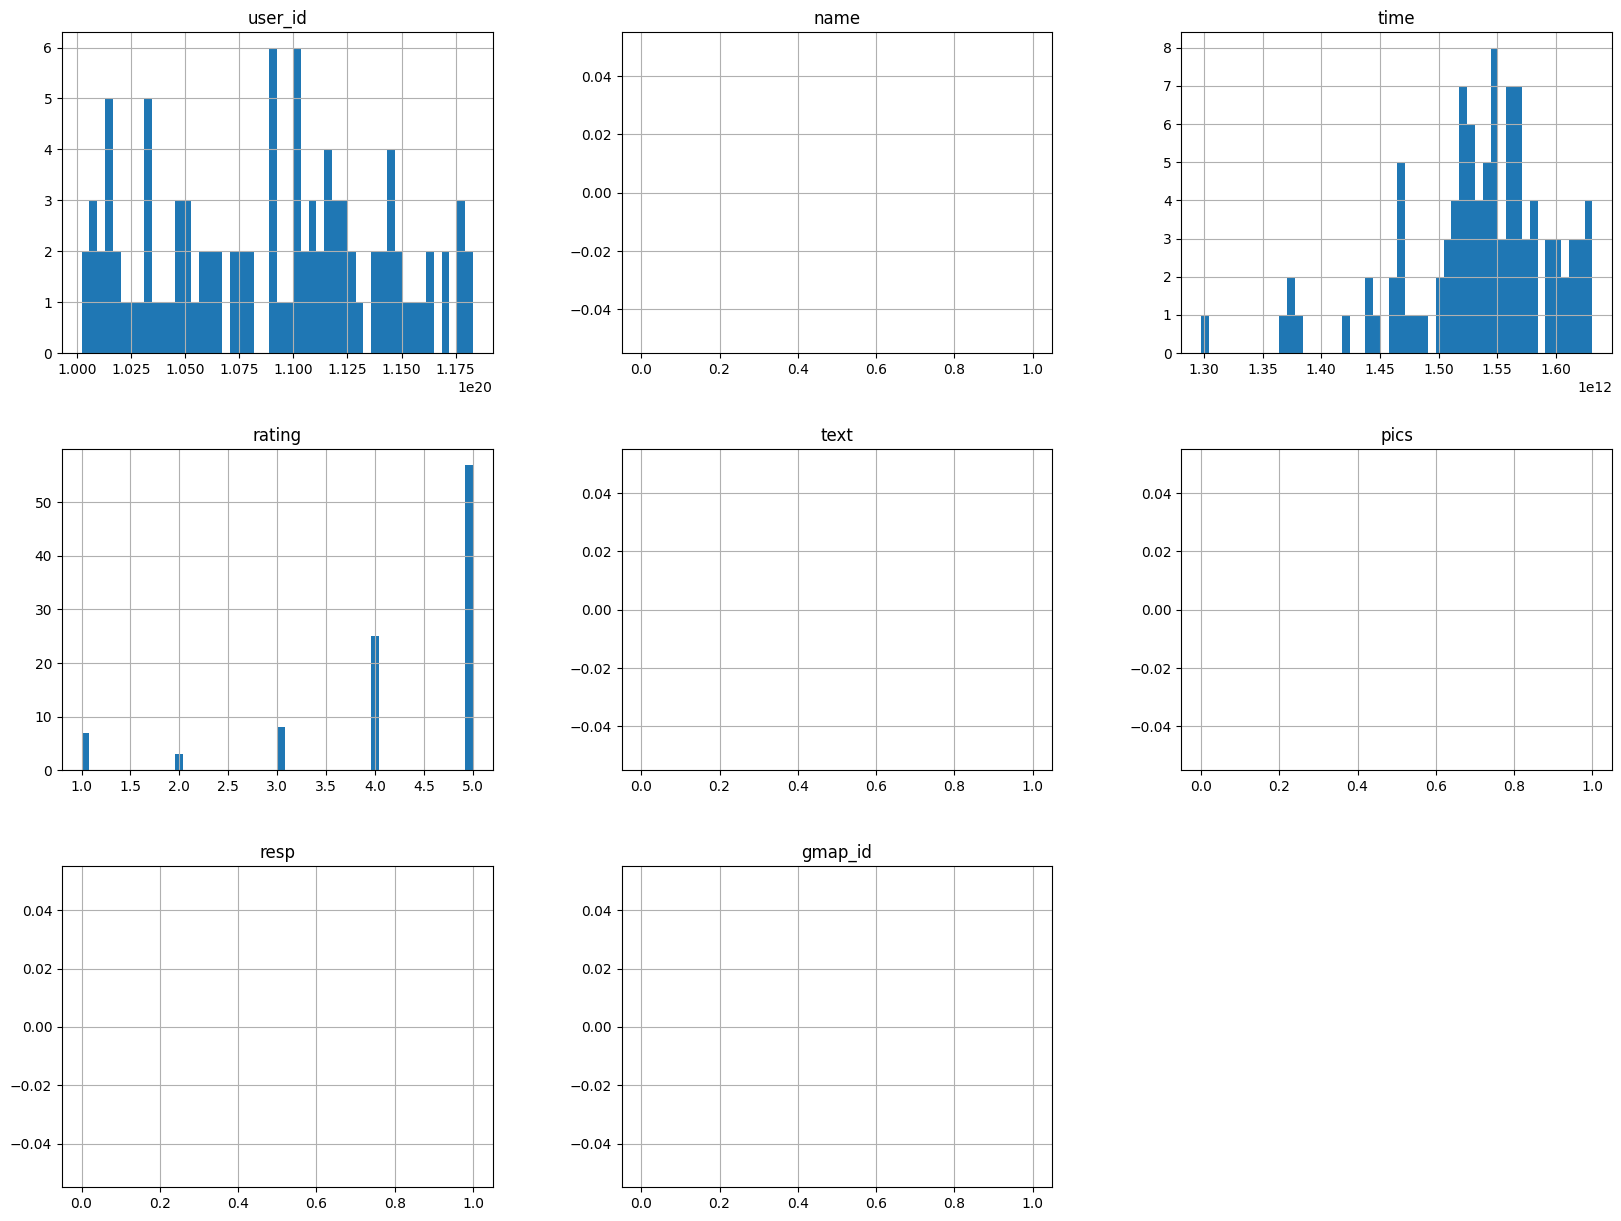

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Importar NumPy

# Suponiendo que 'df' es tu DataFrame
print(df.dtypes)  # Ver tipos de datos

# Convertir columnas de string a numéricas donde sea necesario
for column in df.columns:
    if df[column].dtype == object:
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            continue  # Si la columna no puede ser convertida a numérica, continúa

# Verificar y graficar
if df.select_dtypes(include=[np.number]).empty:
    print("No hay columnas numéricas para plotear.")
else:
    df.hist(bins=50, figsize=(20,15))
    plt.show()

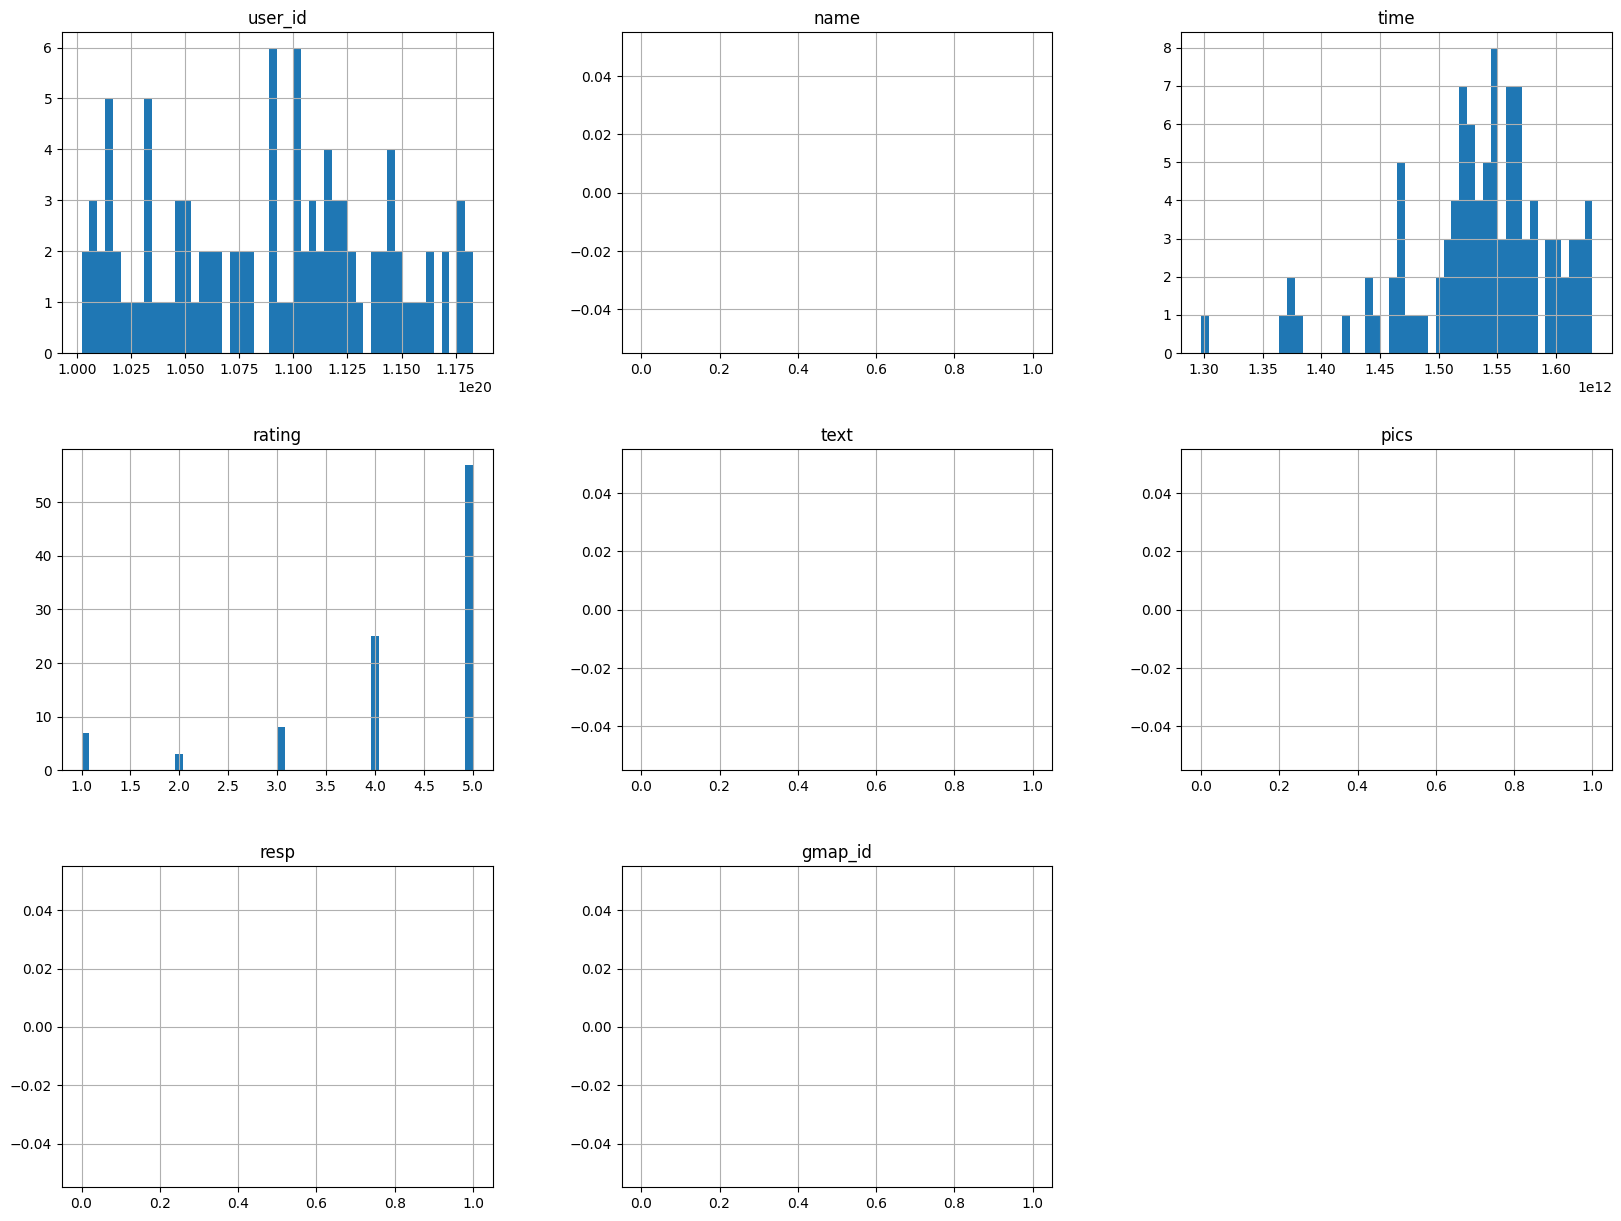

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que ahora 'df' tiene columnas numéricas
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Ejemplo de cómo convertir una columna de string a numérica
# Reemplaza 'nombre_de_columna' con el nombre real de la columna que quieres convertir
# Por ejemplo, si la columna se llama 'A':
df['A'] = pd.to_numeric(df['A'], errors='coerce')  # 'coerce' convertirá los errores a NaN

# Aplica esto a todas las columnas relevantes

KeyError: 'A'

In [ ]:
# Check the column names in your DataFrame
print(df.columns)

# Replace 'A' with the actual name of the column you want to convert
df['A'] = pd.to_numeric(df['A'], errors='coerce')

In [ ]:
# Ejemplo de cómo convertir una columna de string a numérica
# Reemplaza 'nombre_de_columna' con el nombre real de la columna que quieres convertir
# Por ejemplo, si la columna se llama 'A':
df['A'] = pd.to_numeric(df['A'], errors='coerce')  # 'coerce' convertirá los errores a NaN

# Aplica esto a todas las columnas relevantes

In [ ]:
# Check the column names in your DataFrame
print(df.columns)

# Replace 'years' with the actual name of the column you want to convert
# For example, if the column is named 'C', use:
df['C'] = pd.to_numeric(df['C'], errors='coerce')

In [ ]:
# Check for existing columns before conversion
for column in df.columns:
    if df[column].dtype == object:
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            continue  # Si la columna no puede ser convertida a numérica, continúa

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame
print(df.dtypes)  # Check data types of columns

# Convert string columns to numerical where needed
for column in df.columns:
    if df[column].dtype == object:
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            print(f"Could not convert column '{column}' to numeric.")

# Check for numerical columns after conversion
numerical_cols = df.select_dtypes(include=[np.number]).columns
if not numerical_cols.empty:
    sns.pairplot(df[numerical_cols])  # Plot only numerical columns
    plt.show()
else:
    print("No numerical columns found for plotting.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample DataFrame (replace this with your actual data)
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Check if there are numeric columns
if df.select_dtypes(include=[np.number]).empty:
    print("No hay columnas numéricas para plotear.")
else:
    sns.pairplot(df)
    plt.show()

In [ ]:
df.to_csv('/content/drive/My Drive/eda_results.csv', index=False)

In [ ]:
!pip install pandas pandas-profiling[notebook]

In [ ]:
!pip install pydantic-settings

In [ ]:
!pip install sweetviz

In [ ]:
for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print(f"La columna '{column}' contiene tipos no hasheables.")

In [ ]:
for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        df[column] = df[column].apply(str)

In [ ]:
!pip install sweetviz # Make sure Sweetviz is installed
import sweetviz as sv # Import the Sweetviz library

report = sv.analyze(df)
# Change the filepath to a valid location. If using Google Colab, mount your Google Drive first.
report.show_html("Sweetviz_EDA_Report.html")

In [ ]:
import sweetviz as sv
from google.colab import drive # Import the necessary library to mount Google Drive

drive.mount('/content/drive') # Mount your Google Drive

report = sv.analyze(df)
report.show_html("/content/drive/My Drive/Sweetviz_EDA_Report.html") # Now this path should be accessible

In [ ]:
!pip install ijson

In [ ]:
# Instalar las bibliotecas necesarias
!pip install ijson
!pip install sweetviz

import pandas as pd
import ijson
import sweetviz as sv

def read_full_json(file_path):
    """ Lee todos los datos de un archivo JSON almacenado en Google Drive. """
    data = []
    try:
        with open(file_path, 'rb') as file:  # 'rb' para modo binario, necesario para ijson
            objects = ijson.items(file, 'item')  # Ajusta 'item' dependiendo de la estructura del JSON
            for obj in objects:
                data.append(obj)
        return pd.DataFrame(data)
    except FileNotFoundError:
        print(f"Archivo no encontrado en: {file_path}")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error al procesar el archivo: {e}")
        return pd.DataFrame()

# Ruta del archivo JSON en Google Drive
file_path = '/content/drive/My Drive/1.json'  # Cambia a la ruta correcta

# Leer datos
df = read_full_json(file_path)

# Verificar y convertir tipos de datos no hasheables
for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        df[column] = df[column].apply(str)

# Análisis exploratorio de datos con Sweetviz
report = sv.analyze(df)
report.show_html("/content/drive/My Drive/Sweetviz_EDA_Report.html")

print("El informe de EDA ha sido creado y guardado en Google Drive.")

In [ ]:
import os  # Importa la biblioteca os

# Ruta del archivo JSON en Google Drive
file_path = '/content/drive/My Drive/1.json'  # Cambia a la ruta correcta
output_dir = "/content/drive/My Drive"  # Define la ruta del directorio de salida

# Asegúrate de que el directorio de salida exista, de lo contrario créalo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Crea el directorio si no existe

# Leer datos
df = read_full_json(file_path)

# Verificar y convertir tipos de datos no hasheables
for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        df[column] = df[column].apply(str)

# Análisis exploratorio de datos con Sweetviz
report = sv.analyze(df)
report_path = os.path.join(output_dir, "Sweetviz_EDa_Report.html")  # Construye la ruta completa del archivo
report.show_html(report_path)  # Guarda el reporte en la ruta especificada
print("El informe de EDA ha sido creado y guardado en Google Drive.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
file_path = 'https://drive.google.com/file/d/1OnyhmyG8xzdn4XU9LYcnwzBseB1_rChS/view?usp=drive_link'  # Cambia esto a la ruta correcta de tu archivo

In [ ]:
import pandas as pd

# If it's a Google Drive file, mount Drive and use the direct file path
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!pip install sweetviz

In [ ]:
!pip install sweetviz  # Install the Sweetviz library
import pandas as pd
import json
from google.colab import files
import io
import sweetviz as sv  # Now you can import it

# ... rest of your code ...

                               **EDA ARCHIVO DEL ESTADO PENNSILVANNIA **

In [ ]:
import pandas as pd
from google.colab import files
import io
import json

# Subir archivo desde el disco local
uploaded = files.upload()

# Get the filename of the uploaded file. We assume there's only one.
filename = next(iter(uploaded))

data_list = []  # List to store individual JSON objects

# Leer el archivo JSON cargado línea por línea
with io.TextIOWrapper(io.BytesIO(uploaded[filename]), encoding='utf-8') as f:
    for line in f:
        try:
            data = json.loads(line)  # Parse each line as a separate JSON object
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {e}")
            # Print a portion of the line content around the error location for debugging
            error_position = e.pos
            print(f"Content around error: {line[max(0, error_position - 50):min(len(line), error_position + 50)]}")

# Now you have a list of JSON objects
# You can normalize them into a DataFrame
df = pd.json_normalize(data_list)

# Iterate through columns and check for lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Consider handling these before checking for duplicates.")
        # Example handling: converting lists to strings
        # df[col] = df[col].astype(str)

# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

Saving 1 (9) DATASET  ESTADO DE PENNSILVANNIA.json to 1 (9) DATASET  ESTADO DE PENNSILVANNIA (2).json
Column 'pics' contains lists. Consider handling these before checking for duplicates.
                 user_id               name           time  rating  \
0  104944742559079759337    Jaron Whitfield  1517731762839       5   
1  117609702832980320437  Jonathan McCarthy  1476276291163       5   
2  110563242018426632956          Rocky Kev  1338826945578       5   
3  112895973505401399406        Josep Valls  1363286110554       5   
4  110619674885963828884     Timaree Schmit  1548798329760       5   

                                                text  pics  resp  \
0  Joe is quite unique of his line of work, he as...  None   NaN   
1  For such a small place their impact on my life...  None   NaN   
2  I usually give them a call before I stop by to...  None   NaN   
3  My bike had been sitting outdoors for a good w...  None   NaN   
4  Always an easy experience. Service is knowledg..

                   **ANALISIS DESCRIPTIVO EDA ARCHIVO ESTADO DE PENNSILVANNIA **

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
# Ajusta las columnas según tus datos
# Example - replace 'some_numeric_column' with an actual numeric column from your DataFrame
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Limpieza de datos: aquí puedes ajustar según tu análisis anterior
# Iterate through columns and handle lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)  # Convert lists to strings for now

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpieza de valores nulos de forma menos restrictiva
# Replace 'user_id', 'text' with actual critical columns from your DataFrame
df.dropna(subset=['user_id', 'text'], inplace=True)  # Ajusta las columnas críticas

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

ETL ARCHIVO DEL ESTADO DE PENNSILVANNIA: ELIMINACION COLUMNAS PICS, RESP. RESP. TEXT, RESP. TIME Y ELIMINACION NULOS DE LA COLUMNA TEXT.

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Eliminar las columnas específicas antes de continuar con el análisis
columns_to_remove = ['pics', 'resp', 'resp.time', 'resp.text']
df.drop(columns_to_remove, axis=1, inplace=True, errors='ignore')  # Usa errors='ignore' para manejar posibles errores si alguna columna no existe

# Limpieza de datos: Eliminar filas donde la columna 'text' es nula
df = df.dropna(subset=['text'])

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Iterar a través de las columnas y manejar listas
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")


Saving 1 (9) DATASET  ESTADO DE PENNSILVANNIA.json to 1 (9) DATASET  ESTADO DE PENNSILVANNIA (3).json
Descripción Estadística del DataFrame:
                      user_id           name          time        rating  \
count                   86600          86600  8.660000e+04  86600.000000   
unique                  65310          62859           NaN           NaN   
top     114684999067907982861  A Google User           NaN           NaN   
freq                       25             36           NaN           NaN   
mean                      NaN            NaN  1.557913e+12      4.382009   
std                       NaN            NaN  4.831354e+10      1.207797   
min                       NaN            NaN  6.626016e+11      1.000000   
25%                       NaN            NaN  1.526955e+12      4.000000   
50%                       NaN            NaN  1.560826e+12      5.000000   
75%                       NaN            NaN  1.598310e+12      5.000000   
max                    

                               **EDA, ARCHIVO DEL ESTADO DE LA FLORIDA **

In [ ]:
import pandas as pd
from google.colab import files
import io
import json

# Subir archivo desde el disco local
uploaded = files.upload()

# Get the filename of the uploaded file. We assume there's only one.
filename = next(iter(uploaded))

data_list = []  # List to store individual JSON objects

# Leer el archivo JSON cargado línea por línea
with io.TextIOWrapper(io.BytesIO(uploaded[filename]), encoding='utf-8') as f:
    for line in f:
        try:
            data = json.loads(line)  # Parse each line as a separate JSON object
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {e}")
            # Print a portion of the line content around the error location for debugging
            error_position = e.pos
            print(f"Content around error: {line[max(0, error_position - 50):min(len(line), error_position + 50)]}")

# Now you have a list of JSON objects
# You can normalize them into a DataFrame
df = pd.json_normalize(data_list)

# Iterate through columns and check for lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Consider handling these before checking for duplicates.")
        # Example handling: converting lists to strings
        # df[col] = df[col].astype(str)

# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

            **ANALISIS DESCRIPTIVO DEL ARCHIVO DEL ESTADO DE LA FLORIDA **texto en negrita**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
# Ajusta las columnas según tus datos
# Example - replace 'some_numeric_column' with an actual numeric column from your DataFrame
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Limpieza de datos: aquí puedes ajustar según tu análisis anterior
# Iterate through columns and handle lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)  # Convert lists to strings for now

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpieza de valores nulos de forma menos restrictiva
# Replace 'user_id', 'text' with actual critical columns from your DataFrame
df.dropna(subset=['user_id', 'text'], inplace=True)  # Ajusta las columnas críticas

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

  **ETL** **ARCHIVO DEL ESTADO DE LA FLORIDA: ELIMINACION COLUMNAS PICS, RESP. RESP. TEXT, RESP. TIME Y ELIMINACION NULOS DE LA    COLUMNA TEXT.**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Eliminar las columnas específicas antes de continuar con el análisis
columns_to_remove = ['pics', 'resp', 'resp.time', 'resp.text']
df.drop(columns_to_remove, axis=1, inplace=True, errors='ignore')  # Usa errors='ignore' para manejar posibles errores si alguna columna no existe

# Limpieza de datos: Eliminar filas donde la columna 'text' es nula
df = df.dropna(subset=['text'])

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Iterar a través de las columnas y manejar listas
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

Saving 19 DATASET  DEL ESTADO DE LA FLORIDA.json to 19 DATASET  DEL ESTADO DE LA FLORIDA.json
Descripción Estadística del DataFrame:
                      user_id            name          time        rating  \
count                   96627           96627  9.662700e+04  96627.000000   
unique                  70796           68205           NaN           NaN   
top     100086847722340371376  Glenn Triplett           NaN           NaN   
freq                       46              46           NaN           NaN   
mean                      NaN             NaN  1.557440e+12      4.350896   
std                       NaN             NaN  4.136922e+10      1.098913   
min                       NaN             NaN  1.054944e+12      1.000000   
25%                       NaN             NaN  1.530494e+12      4.000000   
50%                       NaN             NaN  1.558838e+12      5.000000   
75%                       NaN             NaN  1.590677e+12      5.000000   
max                 

                                    **EDA DEL ESTADO DE TENNESSEE**

In [ ]:
import pandas as pd
from google.colab import files
import io
import json

# Subir archivo desde el disco local
uploaded = files.upload()

# Get the filename of the uploaded file. We assume there's only one.
filename = next(iter(uploaded))

data_list = []  # List to store individual JSON objects

# Leer el archivo JSON cargado línea por línea
with io.TextIOWrapper(io.BytesIO(uploaded[filename]), encoding='utf-8') as f:
    for line in f:
        try:
            data = json.loads(line)  # Parse each line as a separate JSON object
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {e}")
            # Print a portion of the line content around the error location for debugging
            error_position = e.pos
            print(f"Content around error: {line[max(0, error_position - 50):min(len(line), error_position + 50)]}")

# Now you have a list of JSON objects
# You can normalize them into a DataFrame
df = pd.json_normalize(data_list)

# Iterate through columns and check for lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Consider handling these before checking for duplicates.")
        # Example handling: converting lists to strings
        # df[col] = df[col].astype(str)

# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

                     **ANALISIS DESCRIPTIVO DEL ARCHIVO DEL ESTADO DE TENNESSEE**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
# Ajusta las columnas según tus datos
# Example - replace 'some_numeric_column' with an actual numeric column from your DataFrame
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Limpieza de datos: aquí puedes ajustar según tu análisis anterior
# Iterate through columns and handle lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)  # Convert lists to strings for now

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpieza de valores nulos de forma menos restrictiva
# Replace 'user_id', 'text' with actual critical columns from your DataFrame
df.dropna(subset=['user_id', 'text'], inplace=True)  # Ajusta las columnas críticas

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

**ETL ARCHIVO DEL ESTADO DE TENNESSEE: ELIMINACION COLUMNAS PICS, RESP. RESP. TEXT, RESP. TIME Y ELIMINACION NULOS DE LA COLUMNA TEXT.**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Eliminar las columnas específicas antes de continuar con el análisis
columns_to_remove = ['pics', 'resp', 'resp.time', 'resp.text']
df.drop(columns_to_remove, axis=1, inplace=True, errors='ignore')  # Usa errors='ignore' para manejar posibles errores si alguna columna no existe

# Limpieza de datos: Eliminar filas donde la columna 'text' es nula
df = df.dropna(subset=['text'])

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Iterar a través de las columnas y manejar listas
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

Saving 12 DATASET ESTADO DE TENNESSEE.json to 12 DATASET ESTADO DE TENNESSEE.json
Descripción Estadística del DataFrame:
                      user_id           name          time        rating  \
count                   79881          79881  7.988100e+04  79881.000000   
unique                  47943          46082           NaN           NaN   
top     100468752634934510473  CID FERNANDEZ           NaN           NaN   
freq                       66             66           NaN           NaN   
mean                      NaN            NaN  1.552302e+12      4.248657   
std                       NaN            NaN  3.979331e+10      1.162304   
min                       NaN            NaN  1.207333e+12      1.000000   
25%                       NaN            NaN  1.525292e+12      4.000000   
50%                       NaN            NaN  1.553892e+12      5.000000   
75%                       NaN            NaN  1.580181e+12      5.000000   
max                       NaN            Na

                            ** EDA DEL ARCHIVO DEL ESTADO DE INDIANA**

In [ ]:
import pandas as pd
from google.colab import files
import io
import json

# Subir archivo desde el disco local
uploaded = files.upload()

# Get the filename of the uploaded file. We assume there's only one.
filename = next(iter(uploaded))

data_list = []  # List to store individual JSON objects

# Leer el archivo JSON cargado línea por línea
with io.TextIOWrapper(io.BytesIO(uploaded[filename]), encoding='utf-8') as f:
    for line in f:
        try:
            data = json.loads(line)  # Parse each line as a separate JSON object
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {e}")
            # Print a portion of the line content around the error location for debugging
            error_position = e.pos
            print(f"Content around error: {line[max(0, error_position - 50):min(len(line), error_position + 50)]}")

# Now you have a list of JSON objects
# You can normalize them into a DataFrame
df = pd.json_normalize(data_list)

# Iterate through columns and check for lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Consider handling these before checking for duplicates.")
        # Example handling: converting lists to strings
        # df[col] = df[col].astype(str)

# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

                 ** ANALISIS DESCRIPTIVO DEL ARCHIVO DEL ESTADO DE INDIANA**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
# Ajusta las columnas según tus datos
# Example - replace 'some_numeric_column' with an actual numeric column from your DataFrame
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Limpieza de datos: aquí puedes ajustar según tu análisis anterior
# Iterate through columns and handle lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)  # Convert lists to strings for now

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpieza de valores nulos de forma menos restrictiva
# Replace 'user_id', 'text' with actual critical columns from your DataFrame
df.dropna(subset=['user_id', 'text'], inplace=True)  # Ajusta las columnas críticas

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

**ETL ARCHIVO DEL ESTADO DE INDIANA: ELIMINACION COLUMNAS PICS, RESP. RESP. TEXT, RESP. TIME Y ELIMINACION NULOS DE LA COLUMNA TEXT.**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Eliminar las columnas específicas antes de continuar con el análisis
columns_to_remove = ['pics', 'resp', 'resp.time', 'resp.text']
df.drop(columns_to_remove, axis=1, inplace=True, errors='ignore')  # Usa errors='ignore' para manejar posibles errores si alguna columna no existe

# Limpieza de datos: Eliminar filas donde la columna 'text' es nula
df = df.dropna(subset=['text'])

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Iterar a través de las columnas y manejar listas
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

Saving 15 DATASET ESTADO DE INDIANA.json to 15 DATASET ESTADO DE INDIANA.json
Descripción Estadística del DataFrame:
                      user_id            name          time        rating  \
count                   81852           81852  8.185200e+04  81852.000000   
unique                  54254           52258           NaN           NaN   
top     100470251066951834141  Betty Slocombe           NaN           NaN   
freq                       49              49           NaN           NaN   
mean                      NaN             NaN  1.552832e+12      4.250440   
std                       NaN             NaN  4.061177e+10      1.184567   
min                       NaN             NaN  1.213908e+12      1.000000   
25%                       NaN             NaN  1.526600e+12      4.000000   
50%                       NaN             NaN  1.554771e+12      5.000000   
75%                       NaN             NaN  1.581102e+12      5.000000   
max                       NaN       

                            **EDA DEL ARCHIVO DEL ESTADO DE MISSOURI**

In [ ]:
import pandas as pd
from google.colab import files
import io
import json

# Subir archivo desde el disco local
uploaded = files.upload()

# Get the filename of the uploaded file. We assume there's only one.
filename = next(iter(uploaded))

data_list = []  # List to store individual JSON objects

# Leer el archivo JSON cargado línea por línea
with io.TextIOWrapper(io.BytesIO(uploaded[filename]), encoding='utf-8') as f:
    for line in f:
        try:
            data = json.loads(line)  # Parse each line as a separate JSON object
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {e}")
            # Print a portion of the line content around the error location for debugging
            error_position = e.pos
            print(f"Content around error: {line[max(0, error_position - 50):min(len(line), error_position + 50)]}")

# Now you have a list of JSON objects
# You can normalize them into a DataFrame
df = pd.json_normalize(data_list)

# Iterate through columns and check for lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Consider handling these before checking for duplicates.")
        # Example handling: converting lists to strings
        # df[col] = df[col].astype(str)

# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

              **  ANALISIS DESCRIPTIVO DEL ARCHIVO DEL ESTADO DE MISSOURI**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
# Ajusta las columnas según tus datos
# Example - replace 'some_numeric_column' with an actual numeric column from your DataFrame
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Limpieza de datos: aquí puedes ajustar según tu análisis anterior
# Iterate through columns and handle lists
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)  # Convert lists to strings for now

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpieza de valores nulos de forma menos restrictiva
# Replace 'user_id', 'text' with actual critical columns from your DataFrame
df.dropna(subset=['user_id', 'text'], inplace=True)  # Ajusta las columnas críticas

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

**ETL ARCHIVO DEL ESTADO DE MISSOURI: ELIMINACION COLUMNAS PICS, RESP. RESP. TEXT, RESP. TIME Y ELIMINACION NULOS DE LA COLUMNA TEXT.**

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def read_full_json(file_path):
    """Función para leer un archivo JSON completo desde una ruta especificada."""
    data_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en línea: {e}")
    return data_list

# Subir el archivo desde el disco local en Colab
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = '/content/' + filename

# Leer los datos
data_list = read_full_json(file_path)
df = pd.json_normalize(data_list)

# Eliminar las columnas específicas antes de continuar con el análisis
columns_to_remove = ['pics', 'resp', 'resp.time', 'resp.text']
df.drop(columns_to_remove, axis=1, inplace=True, errors='ignore')  # Usa errors='ignore' para manejar posibles errores si alguna columna no existe

# Limpieza de datos: Eliminar filas donde la columna 'text' es nula
df = df.dropna(subset=['text'])

# Conversión de tipos de datos para columnas específicas, si es necesario
# df['some_date_column'] = pd.to_datetime(df['some_date_column'])

# Análisis descriptivo básico
print("Descripción Estadística del DataFrame:")
print(df.describe(include='all'))  # Incluye todas las columnas para el análisis

# Verificación de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

# Visualización de distribuciones y relaciones
if 'created_at' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['created_at'], kde=True)
    plt.title('Distribución de created_at')
    plt.show()

    # Boxplot para ver outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['created_at'])
    plt.title('Boxplot de created_at')
    plt.show()

# Guardar el DataFrame antes de limpieza para comparación posterior
df.to_csv('/content/raw_data.csv', index=False)
print("Datos originales guardados en '/content/raw_data.csv'.")

# Iterar a través de las columnas y manejar listas
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains lists. Converting to strings for deduplication.")
        df[col] = df[col].astype(str)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Guardar el DataFrame limpio
df.to_csv('/content/cleaned_data.csv', index=False)
print("Datos limpios guardados en '/content/cleaned_data.csv'.")

# Análisis exploratorio de datos con Sweetviz (Opcional)
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('/content/Sweetviz_Report.html')
# print("El informe de EDA Sweetviz está disponible en '/content/Sweetviz_Report.html'.")

Saving 11 DATASET  ESTADO DE MISSOURI.json to 11 DATASET  ESTADO DE MISSOURI.json
Descripción Estadística del DataFrame:
                      user_id        name          time        rating  \
count                   84430       84430  8.443000e+04  84430.000000   
unique                  49704       47956           NaN           NaN   
top     100185248374527348665  John Boone           NaN           NaN   
freq                       76          76           NaN           NaN   
mean                      NaN         NaN  1.550726e+12      4.241135   
std                       NaN         NaN  4.026531e+10      1.154556   
min                       NaN         NaN  1.262551e+12      1.000000   
25%                       NaN         NaN  1.523812e+12      4.000000   
50%                       NaN         NaN  1.552507e+12      5.000000   
75%                       NaN         NaN  1.578608e+12      5.000000   
max                       NaN         NaN  1.621924e+12      5.000000   

  

In [ ]:
  import pandas as pd
import json

def load_and_normalize_csv(file_path):
    """Función para leer un archivo CSV y convertirlo en un DataFrame."""
    # Adding error handling to identify the problematic line
    try:
        return pd.read_csv(file_path, encoding='latin-1') # Try 'latin-1' encoding
    except pd.errors.ParserError as e:
        print(f"Error reading CSV: {e}")
        # Extract line number from error message
        error_line = int(str(e).split('line ')[1].split(',')[0])
        print(f"Problematic line number: {error_line}")
        # Optionally, read the file and print the problematic line for inspection
        with open(file_path, 'r', encoding='latin-1') as file: # Use 'latin-1' here as well
            for i, line in enumerate(file):
                if i+1 == error_line:
                    print(f"Problematic line content: {line}")
        return None  # Or handle the error as needed

# Cargar datos de metadatos desde un archivo JSON local (ajusta la ruta según corresponda)
def load_and_normalize_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.json_normalize(data)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # This line initiates the mounting process

# Assuming the file is in the shared folder you provided, double-check this path!
# Use this code to list files in your Drive and find the correct path
import os
print(os.listdir('/content/drive/MyDrive/')) # List files in your main Drive directory

# Update the file_path based on the output of the previous line
file_path = '/content/drive/MyDrive/YOUR_ACTUAL_FOLDER/metadata_sitios.json'  # Replace 'YOUR_ACTUAL_FOLDER'

# Verify the file exists
if os.path.exists(file_path):
    print("File exists")
    metadata_sitios_df = load_and_normalize_json(file_path)
else:
    print("File not found. Please check the path.")

# Nombres de los archivos de revisión por estado, ajusta las rutas según corresponda
state_files = {
    'PA': '/content/cleaned_data (1) ESTADO DE PENNSILVANIA.csv',  # Update with actual paths
    'FL': '/content/cleaned_data (2) ESTADO DE LA FLORIDA.csv',
    'TN': '/content/cleaned_data (3) ESTADO DE TENNESSEE.csv',
    'IN': '/content/cleaned_data (4) ESTADO DE INDIANA.csv',
    'MO': '/content/cleaned_data (6) ESTADO DE MISSOURI.csv'
}

# Verify each file path exists before processing
for state, file_path in state_files.items():
    if os.path.exists(file_path):
        print(f"File for {state} exists: {file_path}")
        review_df = load_and_normalize_csv(file_path)
        if review_df is not None: # Check if DataFrame was loaded successfully
            combined_df = pd.merge(metadata_sitios_df, review_df, on='gmap_id', how='inner')

            # Guardar el DataFrame combinado para cada estado, o realizar análisis adicionales aquí
            combined_df.to_csv(f'/content/combined_data_{state}.csv', index=False)  # Update with desired save location
            print(f"Datos combinados para {state} guardados con éxito.")
    else:
        print(f"File for {state} not found: {file_path}. Please check the path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['australian_user_reviews.json', 'Classroom', 'zoom_0 (2).mp4', 'vpi-remw-fis (2020-04-15 at 12:10 GMT-7).gdrive', 'Documento sin título (13).gdoc', 'Documento sin título (12).gdoc', 'PLANILLA DE PAGOSIMPLE ABRIL 2020.pdf', 'CUMPLIMIENTO DE REQUISITOS.docx', 'Primera sesión. Yo no parí para la muerte - Reincorporación 02_06_2020 (respuestas).xlsx', 'Primera sesión. Yo no parí para la muerte - Reincorporación 02_06_2020 (respuestas).gsheet', 'PLANILLA DE PAGOSIMPLE ABRIL 2020.gdoc', 'Segumiento Fichas Inversión 2020.xlsx', 'Confirmación de asistencia al evento (1).gform', 'Confirmación de asistencia al evento.gform', 'Screenshot_20200625-141405_Samsung Internet.jpg', 'Documento sin título (11).gdoc', 'Segumiento Fichas Inversión 2020.gsheet', 'Saint-Exupery-Le_Petit_Prince (1).epub', 'Epson iPrint', 'Lista de Chequeo Paz Al Barrio en Sol de Orient

In [ ]:
import pandas as pd
from google.colab import files

# Cargar el archivo desde el sistema local
uploaded = files.upload()

# Asigna el nombre del archivo a una variable
file_name = next(iter(uploaded))

# Intenta con diferentes codificaciones comunes
codificaciones = ['latin1', 'ISO-8859-1', 'cp1252']  # Lista de codificaciones comunes que podrían funcionar

for codificacion in codificaciones:
    try:
        # Leer el archivo con la codificación especificada y manejar líneas erróneas
        df = pd.read_csv(file_name, encoding=codificacion, on_bad_lines='skip')
        print("Archivo cargado correctamente con codificación:", codificacion)
        print(df.head())
        break  # Si el archivo se carga correctamente, no hay necesidad de seguir probando otras codificaciones
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo con codificación {codificacion}: {e}")

# Si todas las codificaciones fallan, mostrar un mensaje final
else:
    print("No se pudo cargar el archivo con ninguna de las codificaciones probadas.")

Saving cleaned_data (2) ESTADO DE LA FLORIDA.csv to cleaned_data (2) ESTADO DE LA FLORIDA.csv
Archivo cargado correctamente con codificación: latin1
                                             user_id  \
0                              104581351141623173083   
1                              100742010917674026882   
2  116708114943541819893,D. Murphy,1532994321099,...   
3          Forget the food trucks trying to recreate   
4  I seriously could eat them every day..;;;;;;;;...   

                                                name           time rating  \
0                                     Blake Castillo  1555873777420      5   
1                                     Sarah Williams  1548086828888      5   
2                                                NaN            NaN    NaN   
3   and try these folks.;;;;;;;;;;;;;;;;;;;;;;;;;...            NaN    NaN   
4                                                NaN            NaN    NaN   

                                             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import os

# Ruta de la carpeta en Google Drive
folder_path = '/content/drive/My Drive/path_to_jsons'
json_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')]

# Inicializa un DataFrame vacío
df_metadatos = pd.DataFrame()

# Cargar y filtrar cada archivo JSON
for file_path in json_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

        # Filtrar para incluir solo registros con 'gmap_id' y revisar si hay reseñas positivas si eso es parte de la estructura
        filtered_data = [
            {'gmap_id': item['gmap_id'], 'avg_rating': item['avg_rating']}
            for item in data if 'gmap_id' in item and 'avg_rating' in item and item['avg_rating'] >= 4
        ]

        # Crear un DataFrame temporal y agregarlo al DataFrame principal
        if filtered_data:
            temp_df = pd.DataFrame(filtered_data)
            df_metadatos = pd.concat([df_metadatos, temp_df], ignore_index=True)

# Mostrar los datos cargados
print(df_metadatos.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/path_to_jsons'

In [ ]:
  import pandas as pd
import json
import os
from google.colab import drive

# Extrae el ID de la carpeta de la URL
folder_id = '1Wf7YkxA0aHI3GpoHc9Nh8_scf5BbD4DA'

# Monta la carpeta compartida de Google Drive usando el ID
drive.mount('/content/drive', force_remount=True)
folder_path = f'/content/drive/MyDrive/Shareddrives/{folder_id}'

# Verifica si la carpeta existe
if os.path.exists(folder_path):
    json_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')]

    # Inicializa un DataFrame vacío
    df_metadatos = pd.DataFrame()

    # Carga y filtra cada archivo JSON
    for file_path in json_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)

            # Filtra para incluir solo registros con 'gmap_id' y revisa si hay reseñas positivas si eso es parte de la estructura
            filtered_data = [
                {'gmap_id': item['gmap_id'], 'avg_rating': item['avg_rating']}
                for item in data if 'gmap_id' in item and 'avg_rating' in item and item['avg_rating'] >= 4
            ]

            # Crea un DataFrame temporal y agrégalo al DataFrame principal
            if filtered_data:
                temp_df = pd.DataFrame(filtered_data)
                df_metadatos = pd.concat([df_metadatos, temp_df], ignore_index=True)

    # Muestra los datos cargados
    print(df_metadatos.head())

else:
    print(f"Carpeta no encontrada: {folder_path}. Por favor verifica el ID de la carpeta.")

Mounted at /content/drive
Carpeta no encontrada: /content/drive/MyDrive/Shareddrives/1Wf7YkxA0aHI3GpoHc9Nh8_scf5BbD4DA. Por favor verifica el ID de la carpeta.


In [ ]:
import pandas as pd
import json
import os
from google.colab import drive

# Extrae el ID de la carpeta de la URL
folder_id = '1olnuKLjT8W2QnCUUwh8uDuTTKVZyxQ0Z'  # ID actualizado

# Monta la carpeta compartida de Google Drive usando el ID
drive.mount('/content/drive', force_remount=True)
folder_path = f'/content/drive/MyDrive/Shareddrives/{folder_id}'

# Verifica si la carpeta existe
if os.path.exists(folder_path):
    json_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')]

    # Inicializa un DataFrame vacío
    df_metadatos = pd.DataFrame()

    # Carga y filtra cada archivo JSON
    for file_path in json_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)

            # Filtra para incluir solo registros con 'gmap_id' y revisa si hay reseñas positivas si eso es parte de la estructura
            filtered_data = [
                {'gmap_id': item['gmap_id'], 'avg_rating': item['avg_rating']}
                for item in data if 'gmap_id' in item and 'avg_rating' in item and item['avg_rating'] >= 4
            ]

            # Crea un DataFrame temporal y agrégalo al DataFrame principal
            if filtered_data:
                temp_df = pd.DataFrame(filtered_data)
                df_metadatos = pd.concat([df_metadatos, temp_df], ignore_index=True)

    # Muestra los datos cargados
    print(df_metadatos.head())

else:
    print(f"Carpeta no encontrada: {folder_path}. Por favor verifica el ID de la carpeta.")

Mounted at /content/drive
Carpeta no encontrada: /content/drive/MyDrive/Shareddrives/1olnuKLjT8W2QnCUUwh8uDuTTKVZyxQ0Z. Por favor verifica el ID de la carpeta.
